In [5]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from transformers import pipeline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [ ]:
from huggingface_hub import login
login("<your_hf_token>")


In [18]:
ds_en = load_dataset("tyqiangz/multilingual-sentiments", "english", split="train[:1000]")
ds_es = load_dataset("tyqiangz/multilingual-sentiments", "spanish", split="train[:1000]")
ds_de = load_dataset("tyqiangz/multilingual-sentiments", "german", split="train[:1000]")

0000.parquet:   0%|          | 0.00/156k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/120k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/58.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/115k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

In [20]:
df_en = pd.DataFrame(ds_en); df_en["language"] = "en"
df_es = pd.DataFrame(ds_es); df_es["language"] = "es"
df_de = pd.DataFrame(ds_de); df_de["language"] = "de"

In [21]:
df_all = pd.concat([df_en, df_es, df_de], ignore_index=True)
df_all = df_all[["text", "label", "language"]]
print("Combined dataset shape:", df_all.shape)

Combined dataset shape: (3000, 3)


In [23]:
print("Null values:\n", df_all.isnull().sum())

Null values:
 text        0
label       0
language    0
dtype: int64


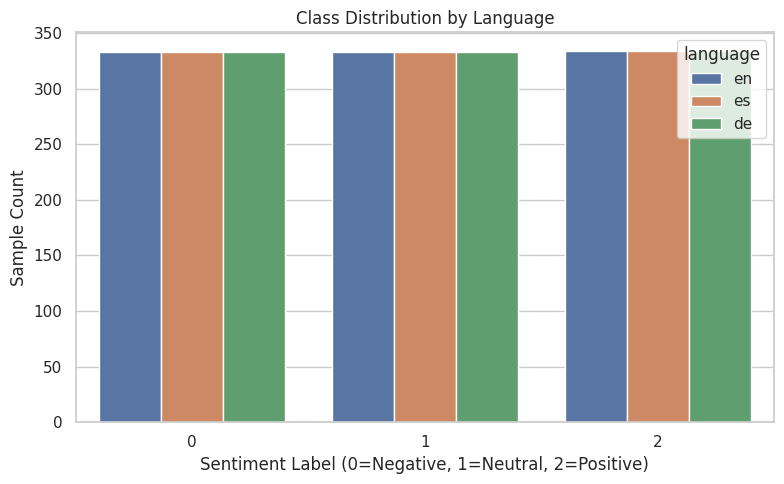

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x="label", hue="language", data=df_all)
plt.title("Class Distribution by Language")
plt.xlabel("Sentiment Label (0=Negative, 1=Neutral, 2=Positive)")
plt.ylabel("Sample Count")
plt.tight_layout()
plt.show()

In [25]:
df_all["length"] = df_all["text"].apply(lambda x: len(str(x).split()))
print("\nText length summary:\n", df_all.groupby("language")["length"].describe())


Text length summary:
            count    mean       std  min   25%   50%   75%   max
language                                                       
de        1000.0  11.412  5.511863  1.0   7.0  11.0  16.0  28.0
en        1000.0  19.679  5.010895  4.0  16.0  20.0  23.0  33.0
es        1000.0  15.644  6.007108  5.0  11.0  16.0  20.0  30.0


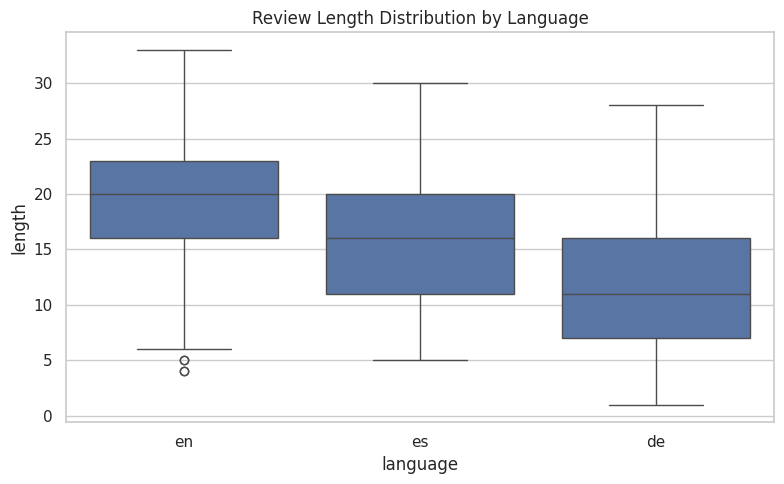

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="language", y="length", data=df_all)
plt.title("Review Length Distribution by Language")
plt.tight_layout()
plt.show()

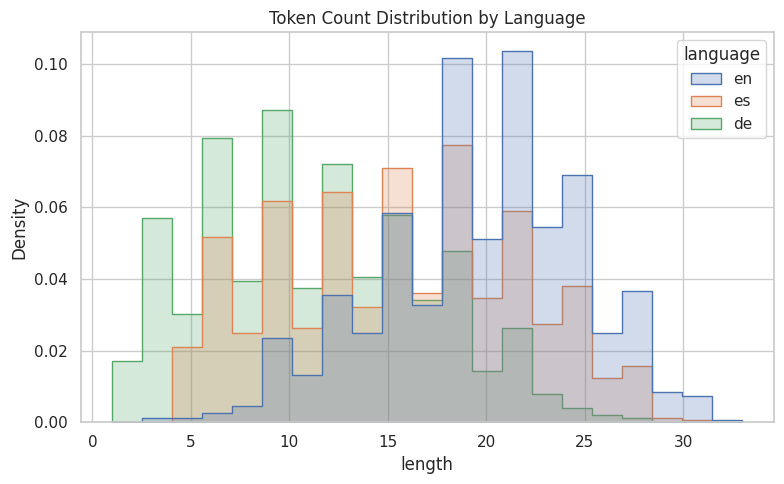

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_all, x="length", hue="language", element="step", stat="density", common_norm=False)
plt.title("Token Count Distribution by Language")
plt.tight_layout()
plt.show()

In [29]:
df_all.to_csv("df_multilingual_eda.csv", index=False)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_df, temp_df = train_test_split(df_all, test_size=0.3, stratify=df_all["label"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42)

In [35]:
train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

In [36]:
print(f"Data Split Complete:")
print(f"   Train: {len(train_df)} samples")
print(f"   Validation: {len(val_df)} samples")
print(f"   Test: {len(test_df)} samples")

Data Split Complete:
   Train: 2100 samples
   Validation: 450 samples
   Test: 450 samples
